In [2]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Definição de funções.

A função abaixo gera amostras de uma função ruidosa criada a partir da seguinte função objetivo (i.e., o mapeamento verdadeiro)
$$y = 2 + x_1 + 0.5 x_1^2$$

In [8]:
# Função que cria o modelo gerador (target function).
def target_function(N, x1, seed):
    # Reset the PN sequence generator.
    np.random.seed(seed)
    # Polinômio de grau 2.
    y = 2 + x1 + 0.5*x1**2
    y_noisy = y + np.random.randn(N, 1)
    return y, y_noisy

### Variância

O estimador **varia** com o conjunto de treinamento.

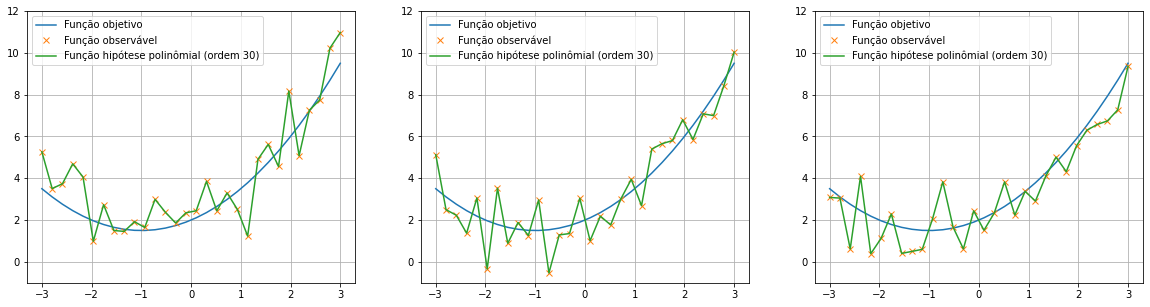

In [18]:
# Example set size.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

fig = plt.figure(figsize=(20,5))

for i in range(3):
    
    ax = plt.subplot(1, 3, i+1)
    # Create target function.
    y, y_noisy = target_function(N, x1, i)
    
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=30, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Perform polynomial regression.
    reg.fit(x1, y_noisy)

    y_pred = reg.predict(x1)
    
    plt.plot(x1, y, label='Função objetivo')
    plt.plot(x1, y_noisy, 'x', label='Função observável')
    plt.plot(x1, y_pred, label='Função hipótese polinômial (ordem 30)')
    plt.legend()
    plt.ylim([-1, 12])
    plt.grid()

### Viés

+ Mesmo com infinitas amostras de treinamento, qual a diferença entre o estimador e a função verdadeira?

+ Não importa quão bem ajustado aos dados o modelo esteja, ele nunca irá capturar a curvatura da função objetivo.

MSE 1.8000107433357444


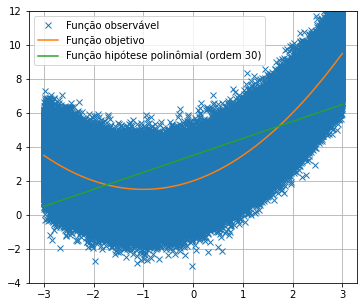

In [25]:
# Example set size.
N = 1000000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

fig = plt.figure(figsize=(20,5))

for i in range(1):
    
    ax = plt.subplot(1, 3, i+1)
    # Create target function.
    y, y_noisy = target_function(N, x1, i)
    
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=1, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Perform polynomial regression.
    reg.fit(x1, y_noisy)

    y_pred = reg.predict(x1)
    mse = mean_squared_error(y_pred, y)
    print('MSE', mse)
    
    plt.plot(x1, y_noisy, 'x', label='Função observável')
    plt.plot(x1, y, label='Função objetivo')
    plt.plot(x1, y_pred, label='Função hipótese polinômial (ordem 30)')
    plt.legend()
    plt.ylim([-4, 12])
    plt.grid()

plt.show()